# 01. Первичный анализ данных
**Цель**: Оценить структуру и качество данных для прогнозирования спроса.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from config.settings import DATA_PATH, REPORTS_PATH

# Настройки
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
# 1. Загрузка данных
print("Загрузка данных...")
train = pd.read_csv(DATA_PATH / "raw/train.csv", low_memory=False)
store = pd.read_csv(DATA_PATH / "raw/store.csv", low_memory=False)

print(f"Размеры: Train {train.shape}, Store {store.shape}")

Загрузка данных...
Размеры: Train (785695, 9), Store (1115, 10)


In [3]:
# 2. Базовая информация
print("\nИнформация о Train данных:")
train.info()

print("\nИнформация о Store данных:")
store.info()


Информация о Train данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785695 entries, 0 to 785694
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          785695 non-null  int64 
 1   DayOfWeek      785695 non-null  int64 
 2   Date           785695 non-null  object
 3   Sales          785695 non-null  int64 
 4   Customers      785695 non-null  int64 
 5   Open           785695 non-null  int64 
 6   Promo          785695 non-null  int64 
 7   StateHoliday   785695 non-null  object
 8   SchoolHoliday  785695 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 53.9+ MB

Информация о Store данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType          

In [4]:
# 3. Пропуски
print("\nАнализ пропусков:")
missing_train = train.isnull().sum()
missing_store = store.isnull().sum()

print("Train пропуски:")
print(missing_train[missing_train > 0])

print("\nStore пропуски:")
print(missing_store[missing_store > 0])


Анализ пропусков:
Train пропуски:
Series([], dtype: int64)

Store пропуски:
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [5]:
# 4. Базовые статистики
print("\nБазовые статистики Sales:")
print(f"Среднее: {train["Sales"].mean():.0f}")
print(f"Медиана: {train["Sales"].median():.0f}")
print(f"Стандартное отклонение: {train["Sales"].std():.0f}")
print(f"Min: {train["Sales"].min()}, Max: {train["Sales"].max()}")


Базовые статистики Sales:
Среднее: 6941
Медиана: 6354
Стандартное отклонение: 3102
Min: 46, Max: 38722


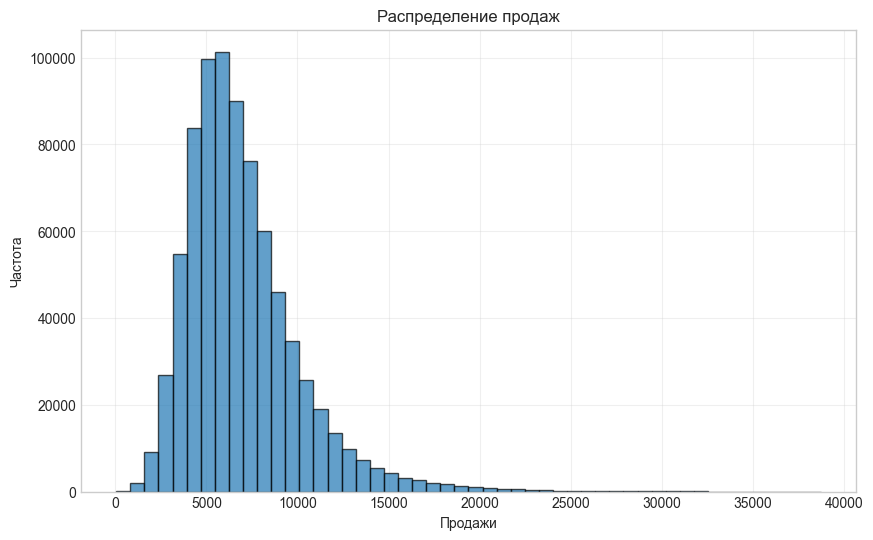

In [6]:
# 5. Визуализация распределения Sales
plt.figure(figsize=(10, 6))
plt.hist(train["Sales"], bins=50, alpha=0.7, edgecolor="black")
plt.title("Распределение продаж")
plt.xlabel("Продажи")
plt.ylabel("Частота")
plt.grid(True, alpha=0.3)
plt.savefig(REPORTS_PATH / "sales_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [7]:
# 6. Анализ временного диапазона
if "Date" in train.columns:
    train["Date"] = pd.to_datetime(train["Date"])
    print(f"\nДиапазон дат: {train["Date"].min().date()} - {train["Date"].max().date()}")
    print(f"Всего дней: {(train["Date"].max() - train["Date"].min()).days}")


Диапазон дат: 2013-01-01 - 2015-05-30
Всего дней: 879


In [8]:
# 7. Выводы
print("ВЫВОДЫ:")
print("-"*50)
print(f"1. Объем данных: {train.shape[0]:,} записей, {train.shape[1]} признаков")
print(f"2. Уникальных магазинов: {train["Store"].nunique()}")
print(f"3. Записей с промо: {train["Promo"].sum():,} ({train["Promo"].mean()*100:.1f}%)")
print(f"4. Основная проблема: {"пропуски в Store данных" if missing_store.sum() > 0 else "нет критических проблем"}")

ВЫВОДЫ:
--------------------------------------------------
1. Объем данных: 785,695 записей, 9 признаков
2. Уникальных магазинов: 1115
3. Записей с промо: 349,713 (44.5%)
4. Основная проблема: пропуски в Store данных
